# Netflix EDA
Performing Exploratory Data Analysis to understand the dataset

### Tasks
- Understand the Dataset, types and missing values
- Clean the dataset and handle the missing values
- Perform Data Visualization
- Create Final Summary report.

In [2]:
#importing Libraries
import numpy as np #helps in working arrays and matrices
import pandas as pd #helps in reading datasets/ making dataframes/manipulating dataframes
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
# reading our dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape #tells us the rows and coulmuns of the dataset

(8807, 12)

In [7]:
df.describe() # tells us the some basic stats about or columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.info() # shows us the count and datatypes of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


Missing values

In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Adjust Data Types and Fill in Missing Values
Verify data types make sense. All except release_year are objects/strings as expected.

Established information from previous test

#### The following do not require any fills:

- type
- title
- release_year
- listed_in
- description

#### The following are missing data:

- duration
- rating
- date_added
- cast
- country
- director
- Check data types, update types where needed and proceed.

date_added to be updated to datetime
'Unavailable' will be substituted in for any nulls of fields with object/string data types. This applies to everything except for release_year.

Update date_added to datetime and check

In [11]:
#covert the data type from object to datetime64
df['date_added'] = pd.to_datetime(df['date_added'])

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Handling Missing Values
rating,cast, country, and director have the nulls filled with 'Unavailable'

In [13]:
df.fillna({'rating': 'Unavailable', 'cast': 'Unavailable', 'country': 'Unavailable', 'director': 'Unavailable'}, inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

For nulls in date_added, missing date_added is to be substituted in with the most recent date from date_added. \ This is because Netflix has the tendency to add more content over time. \ \ Other viable options would be finding actual dates and inputting them manually or dropping the data from results since the amount of missing data is rather small.

In [14]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [15]:
most_recent_entry_date=df['date_added'].max()
df.fillna({'date_added': most_recent_entry_date}, inplace=True)

Proof of concept that the date filled in the null date_added from a show_id example that previously was missing the date_added

In [16]:
df[df.show_id == 's6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


### Additional data cleansing
#### Durations data input error
The missing durations are all movies by Louis C.K. Normally, we would likely fill the duration with the mean duration of movies from the table. In this case it appears that the actual duration was input into the rating column, so one solution is to move the rating data into the duration and make the rating information 'Unavailable' like the other nulls.

In [17]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Check to make sure there is no other content with the same director to avoid accidental overwriting

In [18]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Overwrite and Check

In [19]:
#loc helps us easily accessing the columns by names
df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


Second overwrite and check

In [20]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


# Visualizations

Let's take a look at types of Shows that has been watched on Netflix

In [21]:
df.type.value_counts()   #value_counts method shows the counts of different categoires in a given column

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count Vs Type of Shows ')

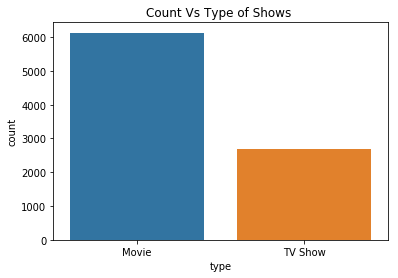

In [22]:
#countplot hepls us to plot counts of each category
sns.countplot(x = 'type' , data = df)
plt.title('Count Vs Type of Shows ')

On Netflix there are more no of Movies as campared to TV shows.

### Country Analysis

In [23]:
df['country'].value_counts().head(10)

United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Country Wise Content on Netflix')

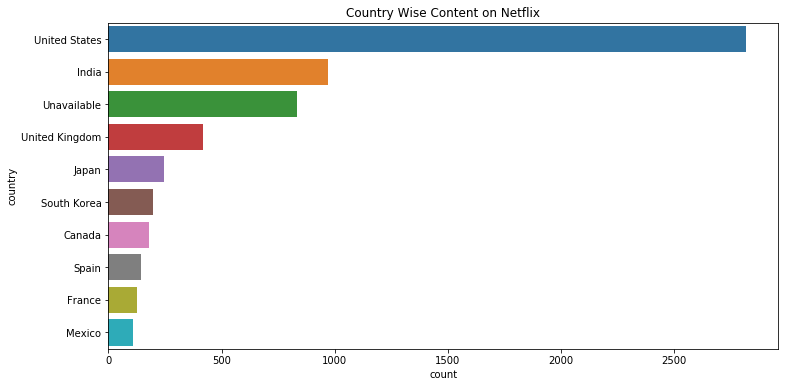

In [24]:
plt.figure(figsize = (12,6))
sns.countplot(y='country' ,order = df['country'].value_counts().index[0:10],data = df)
plt.title('Country Wise Content on Netflix')

In [25]:
#now checking type of content based on country
movie_countries = df[df['type']=='Movie']
tv_show_countries = df[df['type']=='TV Show']

Text(0.5, 1.0, 'Top 10 countries producing TV shows in Netflix')

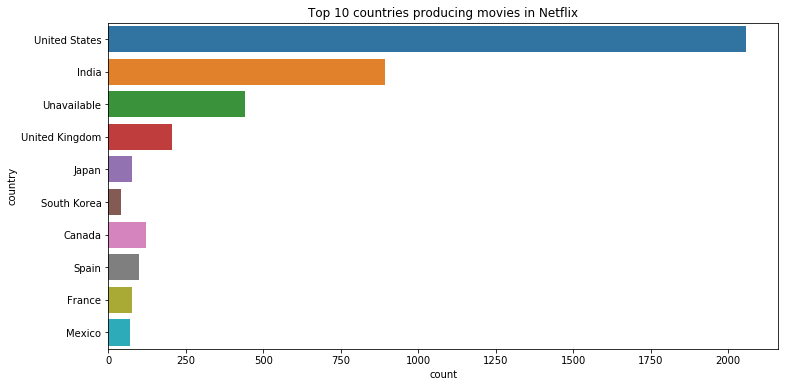

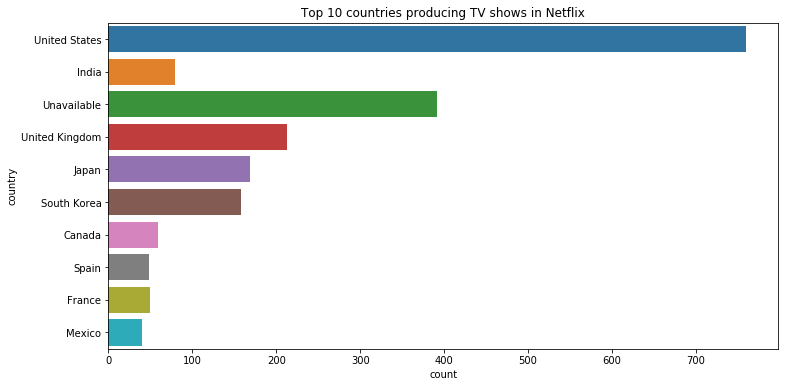

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(y='country' ,order = df['country'].value_counts().index[0:10],data = movie_countries)
plt.title('Top 10 countries producing movies in Netflix')



plt.figure(figsize = (12,6))
sns.countplot(y='country' ,order = df['country'].value_counts().index[0:10],data = tv_show_countries)
plt.title('Top 10 countries producing TV shows in Netflix')

Lets check What are the major ratings given to Netflix shows.

In [27]:
df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
Unavailable       7
TV-Y7-FV          6
UR                3
NC-17             3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Ratings of Shows on Netflix Vs Count')

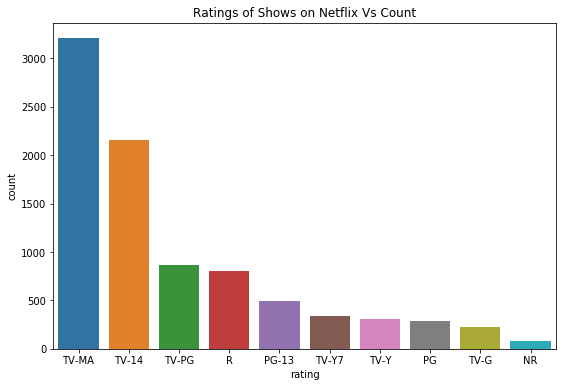

In [28]:
plt.figure(figsize = (9,6))
sns.countplot(x='rating' ,order = df['rating'].value_counts().index[0:10],data = df)
plt.title('Ratings of Shows on Netflix Vs Count')

Most of the Shows has TV-MA and TV-14 ratings.

In [29]:
df.release_year.value_counts()[:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content Release in Years on Netflix vs Count')

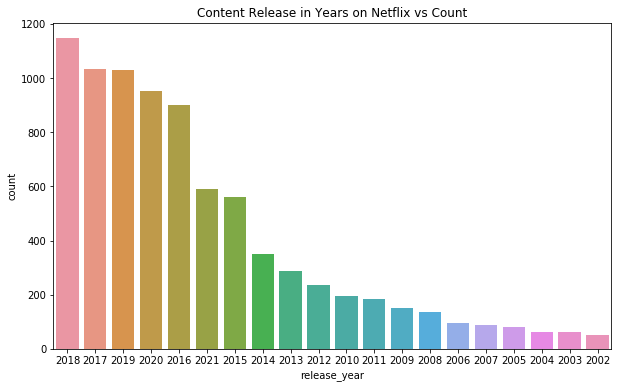

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(x='release_year' ,order = df['release_year'].value_counts().index[0:20],data = df)
plt.title('Content Release in Years on Netflix vs Count')

### Popular Genres Analysis

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

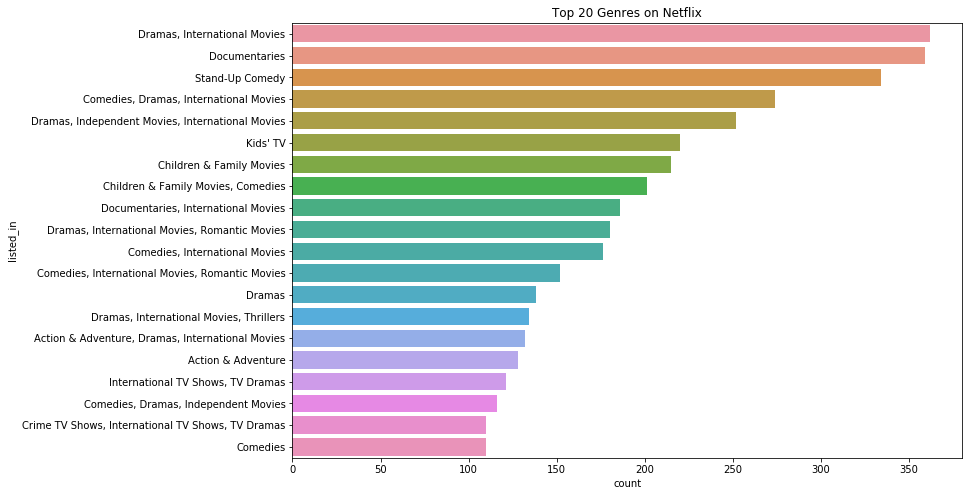

In [31]:
plt.figure(figsize = (12,8))
sns.countplot(y='listed_in' ,order = df['listed_in'].value_counts().index[0:20],data = df)
plt.title('Top 20 Genres on Netflix')

### Summary
So, far we had perform lots of operations over the dataset to dig out some very useful information from it. If, we have to conclude the dataset in few line, than we can say that:

- Netflix has more Movies than TV shows
- Most number of Movies and Tv shows are produced by United States, followed by India who has produced the second most number of movies on Netflix
- Most of the Content on Netflix(Movies and TV shows combined) is for Mature Audiences
- 2018 is the year in which Netflix released alot more Content as compared to other years
- International Movies and Dramas are the most popular Genres on Netflix